In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import ray
import ray.rllib.agents.ppo as ppo
import ray.rllib.agents.ddpg as ddpg
import ray.rllib.agents.sac as sac
import seagul.envs
import numpy as np
from numpy import pi
import gym

In [6]:
home_path = '/home/sgillen/work/'
checkpoint_path = home_path + \
"seagul/seagul/notebooks/humanoid_mesh/data/bench_model/PPO/PPO_Humanoid-v2_0_seed=2_2019-12-16_23-00-311ss47h6n/checkpoint_1525/checkpoint-1525"

In [7]:
# Some delightfully ugly python to infer where everything else is...
csv_path = '/'.join(checkpoint_path.split('/')[:-2]) + '/progress.csv'
save_name = checkpoint_path.split('/')[-3]
expr_file = "/experiment_state-" + save_name[-27:-8] + ".json"
expr_path = '/'.join(checkpoint_path.split('/')[:-3]) + expr_file

expr_data = json.load(open(expr_path))
config = expr_data['checkpoints'][-1]['config']
env_name = config['env']


df = pd.read_csv(csv_path)
#df

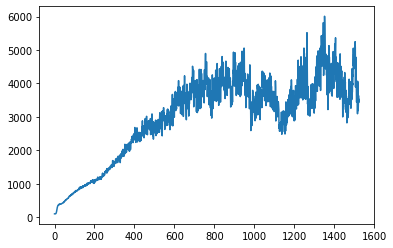

In [8]:
plt.plot(df['episode_reward_mean'])

In [9]:
ray.shutdown()
ray.init()

trainer = ppo.PPOTrainer(config)#, config['env_name'])
#trainer = ddpg.DDPGTrainer(config)
trainer.restore(checkpoint_path)

2019-12-17 17:32:11,685	INFO resource_spec.py:205 -- Starting Ray with 6.88 GiB memory available for workers and up to 3.45 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2019-12-17 17:32:12,052	INFO trainer.py:344 -- Tip: set 'eager': true or the --eager flag to enable TensorFlow eager execution
2019-12-17 17:32:12,086	INFO rollout_worker.py:325 -- Could not seed torch
/home/sgillen/miniconda3/envs/ray/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
2019-12-17 17:32:13,614	INFO rollout_worker.py:768 -- Built policy map: {'default_policy': <ray.rllib.policy.tf_policy_template.PPOTFPolicy object at 0x7f1a844a1898>}
2019-12-17 17:32:13,615	INFO rollout_worker.py:769 -- Built preprocessor map: {'default_policy':

(pid=10302) /home/sgillen/miniconda3/envs/ray/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
(pid=10302)   _np_qint8 = np.dtype([("qint8", np.int8, 1)])
(pid=10302) /home/sgillen/miniconda3/envs/ray/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
(pid=10302)   _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
(pid=10302) /home/sgillen/miniconda3/envs/ray/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
(pid=10302)   _np_qint16 = np.dtype([("q

/home/sgillen/miniconda3/envs/ray/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/sgillen/miniconda3/envs/ray/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


(pid=10307) 2019-12-17 17:32:17,019	INFO rollout_worker.py:325 -- Could not seed torch
(pid=10302) 2019-12-17 17:32:17,073	INFO rollout_worker.py:325 -- Could not seed torch
(pid=10311) 2019-12-17 17:32:17,137	INFO rollout_worker.py:325 -- Could not seed torch
(pid=10303) 2019-12-17 17:32:17,209	INFO rollout_worker.py:325 -- Could not seed torch
(pid=10314) 2019-12-17 17:32:17,399	INFO rollout_worker.py:325 -- Could not seed torch
(pid=10305) 2019-12-17 17:32:17,457	INFO rollout_worker.py:325 -- Could not seed torch


/home/sgillen/miniconda3/envs/ray/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


(pid=10301) 2019-12-17 17:32:17,669	INFO rollout_worker.py:325 -- Could not seed torch
(pid=10302) /home/sgillen/miniconda3/envs/ray/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
(pid=10302)   "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
(pid=10307) /home/sgillen/miniconda3/envs/ray/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
(pid=10307)   "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
(pid=10306) 2019-12-17 17:32:17,786	INFO rollout_worker.py:325 -- Could not seed torch
(pid=10311) /home/sgillen/miniconda3/envs/ray/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a d

2019-12-17 17:32:19,538	INFO trainable.py:358 -- Restored from checkpoint: /home/sgillen/work/seagul/seagul/notebooks/humanoid_mesh/data/bench_model/PPO/PPO_Humanoid-v2_0_seed=2_2019-12-16_23-00-311ss47h6n/checkpoint_1525/checkpoint-1525
2019-12-17 17:32:19,539	INFO trainable.py:365 -- Current state after restoring: {'_iteration': 1525, '_timesteps_total': 50020000, '_time_total': 18238.498443365097, '_episodes_total': 213109}


(pid=10308) /home/sgillen/miniconda3/envs/ray/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
(pid=10308)   "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
(pid=10299) /home/sgillen/miniconda3/envs/ray/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
(pid=10299)   "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [17]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
%matplotlib inline

#env = gym.make(env_name)
#env.unwrapped.reset_model = det_reset_model

env = gym.make("Humanoid-v2")
env._max_episode_steps = 10000
obs = env.reset()

action_hist = []
m_act_hist = []
state_hist  = []
obs_hist = []
reward_hist = []

done = False

#np.random.seed(0)
#random.seed(0)
#tf.set_random_seed(0)

#with trainer.get_policy().get_session():

while not done:
    #actions = trainer.compute_action(obs.flatten())
    sampled_actions, _ , out_dict = trainer.compute_action(obs.flatten(),full_fetch=True)
    mean_actions = out_dict['behaviour_logits'][:17]
    obs, reward, done, _ = env.step(np.asarray(mean_actions))
    action_hist.append(np.copy(mean_actions))
    obs_hist.append(np.copy(obs))
    reward_hist.append(np.copy(reward))

    if done:
        break

print(sum(reward_hist))
print(len(obs_hist))
#plt.plot(action_hist)
#plt.figure()
#plt.figure()
#plt.plot(obs_hist)
#plt.figure()
    

20069.347432970702
1654


In [ ]:
# Reminder that the bahavior logits that come out are the mean and logstd (not log mean, despite the name logit)
trainer.compute_action(obs, full_fetch=True)